<div align='center'>
    <h1>Jurnal Praktikum Dasar Kecerdasan Artifisial</h1>
    <h3>Modul 12: Pengenalan Library Scikit-Fuzzy</h3>
</div>

### Tujuan Praktikum
- Mahasiswa memahami cara pembuatan program dengan *library* Scikit-Fuzzy.
- Mahasiswa mengetahui fitur-fitur utama yang tersedia di *library* Scikit-Fuzzy.


**Jangan lupa untuk selalu import *library* yang diperlikan ketika memulai sesi baru (*run time*) atau kode Python** 

In [3]:
import sympy as sp
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

### **1. Prediksi Konsumsi Energi Gedung** (Bobot Nilai: 50)

Anda diminta untuk mengembangkan sistem fuzzy yang dapat memprediksi Konsumsi Energi Harian sebuah gedung berdasarkan tiga parameter berikut:

1. Jumlah Penghuni dalam satuan orang, dengan rentang 0 hingga 100.
    - Fuzzy Set :
        - **Few**: Triangular dengan titik $[0, 0, 40]$.
        - **Medium**: Triangular dengan titik $[30, 50, 70]$.
        - **Many**: Triangular dengan titik $[60, 100, 100]$.

2. Suhu Rata-rata Harian (Temperature) dalam derajat Celcius, dengan rentang 15 hingga 35°C.
    - Fuzzy Set :
        - **Low**: Triangular dengan titik $[15, 15, 22]$.
        - **Medium**: Triangular dengan titik $[20, 25, 30]$.
        - **High**: Triangular dengan titik $[28, 35, 35]$.

3. Durasi Penggunaan Listrik dalam jam, dengan rentang 0 hingga 24 jam.
    - Fuzzy Set :
        - **Short**: Triangular dengan titik $[0, 0, 8]$.
        - **Medium**: Triangular dengan titik $[6, 12, 18]$.
        - **Long**: Triangular dengan titik $[15, 24, 24]$.

Sistem akan menghasilkan keluaran berupa Konsumsi Energi (Energy Consumption) dalam kilowatt-jam (kWh).
- Fuzzy Set :
    - **Low**: Triangular dengan titik $[0, 0, 100]$.
    - **Medium**: Triangular dengan titik $[80, 150, 200]$.
    - **High**: Triangular dengan titik $[180, 300, 300]$.


#### **a. Definisikan Variabel Fuzzy** (15 Poin)

In [4]:
# Definisikan variabel input
penghuni = ctrl.Antecedent(np.arange(0, 101, 1), 'penghuni')
temperature = ctrl.Antecedent(np.arange(15, 36, 1), 'temperature')
durasi = ctrl.Antecedent(np.arange(0, 25, 1), 'durasi')

In [5]:
# Definisikan variabel output
energy_consumption = ctrl.Consequent(np.arange(0, 301, 1), 'energy_consumption')

In [6]:
# Lengkapi fungsi keanggotaan berikut
# Fungsi keanggotaan untuk penghuni
penghuni['few'] = fuzz.trimf(penghuni.universe, [0, 0, 40])
penghuni['medium'] = fuzz.trimf(penghuni.universe, [30, 50, 70])
penghuni['many'] = fuzz.trimf(penghuni.universe, [60, 100, 100])

# Fungsi keanggotaan untuk Temperature
temperature['low'] = fuzz.trimf(temperature.universe, [15, 15, 22])
temperature['medium'] = fuzz.trimf(temperature.universe, [20, 25, 30])
temperature['high'] = fuzz.trimf(temperature.universe, [28, 35, 35])

# Fungsi keanggotaan untuk durasi
durasi['short'] = fuzz.trimf(durasi.universe, [0, 0, 8])
durasi['medium'] = fuzz.trimf(durasi.universe, [6, 12, 18])
durasi['long'] = fuzz.trimf(durasi.universe, [15, 24, 24])

# Fungsi keanggotaan untuk Energy Consumption
energy_consumption['low'] = fuzz.trimf(energy_consumption.universe, [0, 0, 100])
energy_consumption['medium'] = fuzz.trimf(energy_consumption.universe, [80, 150, 200])
energy_consumption['high'] = fuzz.trimf(energy_consumption.universe, [180, 300, 300])

#### **b. Tampilkan Graf Untuk Setiap Keanggotaan** (10 Poin)

C:\Users\haida\AppData\Roaming\Python\Python313\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


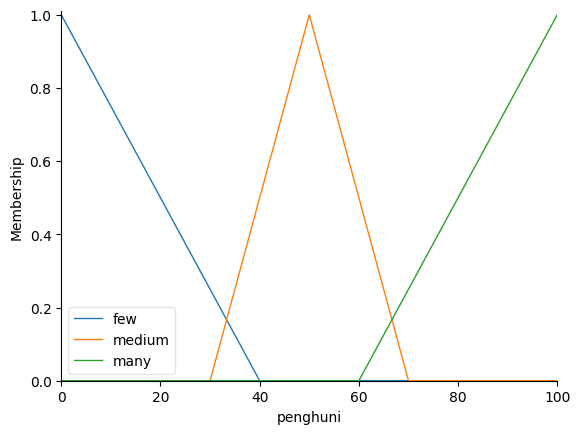

In [7]:
# Buatkan graf untuk keanggotaan penghuni
penghuni.view()
plt.show()

Contoh *output*:

![Visualisasi Output](./asset/1_keanggotaan_penghuni.png)

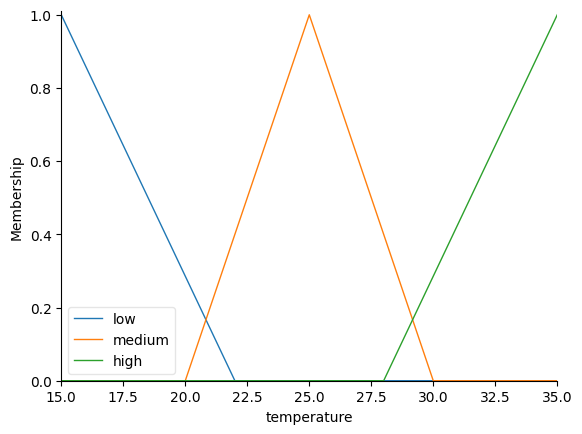

In [ ]:
# Buatkan graf untuk keanggotaan temperature
temperature.view()
plt.show()

Contoh *output*:

![Visualisasi Output](./asset/2_keanggotaan_temperature.png)

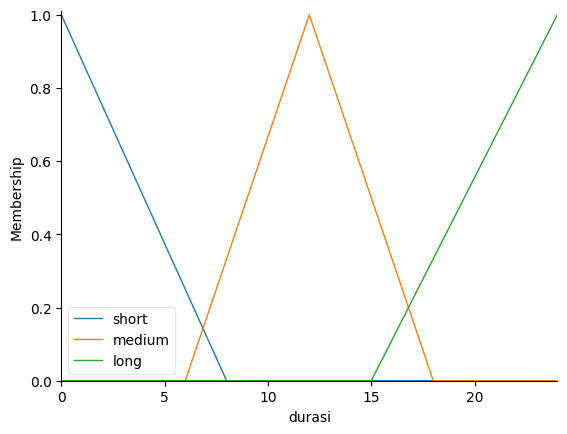

In [ ]:
# Buatkan graf untuk keanggotaan durasi
durasi.view()
plt.show()

Contoh *output*:

![Visualisasi Output](./asset/3_keanggotaan_durasi.png)

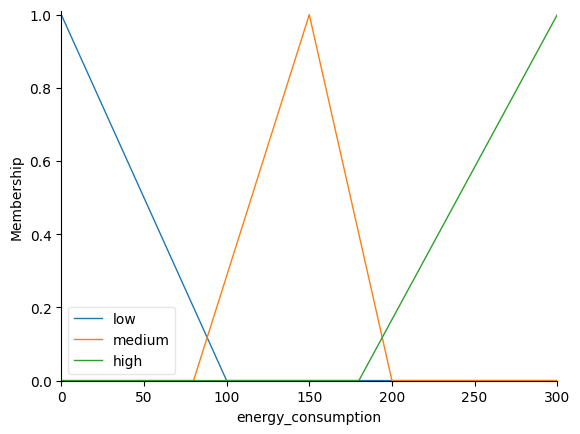

In [ ]:
# Buatkan graf untuk keanggotaan energy consumtion
energy_consumption.view()
plt.show()

Contoh *output*:

![Visualisasi Output](./asset/4_keanggotaan_energy_consumtion.png)

#### **c. Buat Aturan Fuzzy** (15 Poin)

Buat aturan fuzzy berikut:
1. Jika Penghuni "few" DAN Durasi "short", maka Energy Consumption "low"
2. Jika Penghuni "many" ATAU Temperature "high", maka Energy Consumption "high"
3. Jika Temperature "medium" DAN Durasi "medium", maka Energy Consumption "medium"
4. Jika Penghuni "few" DAN NOT Temperature "high", maka Energy Consumption "low"
5. Jika Durasi "long" ATAU (Temperature "low" DAN Penghuni "medium"), maka Energy Consumption "high"

In [11]:
# Lengkapi dengan aturan fuzzy sesuai deskripsi
rule1 = ctrl.Rule(penghuni['few'] & durasi['short'], energy_consumption['low'])
rule2 = ctrl.Rule(penghuni['many'] | temperature['high'], energy_consumption['high'])
rule3 = ctrl.Rule(temperature['medium'] & durasi['medium'], energy_consumption['medium'])
rule4 = ctrl.Rule(penghuni['few'] & ~temperature['high'], energy_consumption['low'])
rule5 = ctrl.Rule(durasi['long'] | (temperature['low'] & penghuni['medium']), energy_consumption['high'])

In [12]:
# Tambahkan aturan ke sistem kontrol
energy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
energy_simulation = ctrl.ControlSystemSimulation(energy_ctrl)

#### **d. Simulasikan Sistem** (10 Poin)

Simulasikan sistem fuzzy dengan input berikut:

Penghuni = 45 orang

Temperature = 26°C

Durasi = 14 jam

Tampilkan konsumsi energi yang diprediksi.

In [13]:
# Masukkan input ke dalam sistem fuzzy

# Jalankan simulasi

# Cetak hasil
energy_simulation.input['penghuni'] = 45
energy_simulation.input['temperature'] = 26
energy_simulation.input['durasi'] = 14

energy_simulation.compute()


Hasil prediksi konsumsi energi: 142.78 kWh


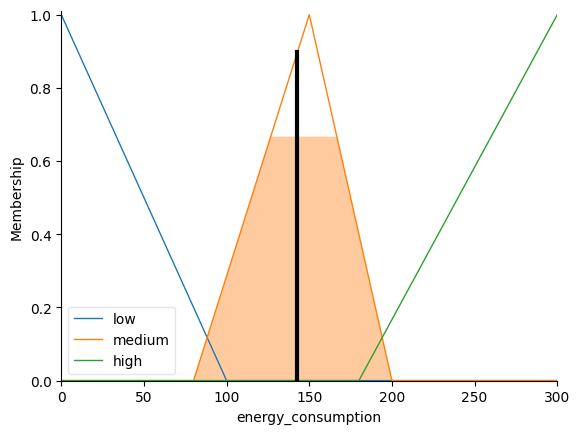

In [14]:
# Menampilkan hasil & visualisasi perhitungan
print(f"Hasil prediksi konsumsi energi: {energy_simulation.output['energy_consumption']:.2f} kWh")
energy_consumption.view(sim=energy_simulation)
plt.show()

Contoh *output*:

![Visualisasi Output](./asset/5_energy_simulation.png)

### **2. Penentuan Risiko Investasi** (Bobot: 50)

Anda diminta untuk membuat sistem fuzzy yang dapat menentukan Risiko Investasi berdasarkan tiga parameter:

1. Jumlah Investasi dalam juta Rupiah, dengan rentang 10 hingga 100 juta.
    - Fuzzy Set :
        - **Low**: Triangular dengan titik $[10, 10, 40]$.
        - **Medium**: Triangular dengan titik $[30, 50, 70]$.
        - **High**: Triangular dengan titik $[60, 100, 100]$.

2. Tingkat Pengembalian (Return Rate) dalam persentase, dengan rentang 0% hingga 20%.
    - Fuzzy Set :
        - **Low**: Triangular dengan titik $[0, 0, 7]$.
        - **Medium**: Triangular dengan titik $[5, 10, 15]$.
        - **High**: Triangular dengan titik $[13, 20, 20]$.

3. Stabilitas Pasar dalam skala 0 hingga 10.
    - Fuzzy Set :
        - **Unstable**: Triangular dengan titik $[0, 0, 4]$.
        - **Stable**: Triangular dengan titik $[3, 5, 7]$.
        - **Very Stable**: Triangular dengan titik $[6, 10, 10]$.

Sistem akan menghasilkan keluaran berupa Risiko Investasi.
- Fuzzy Set :
    - **Low**: Triangular dengan titik $[0, 0, 40]$.
    - **Medium**: Triangular dengan titik $[30, 50, 70]$.
    - **High**: Triangular dengan titik $[60, 100, 100]$.


#### **a. Definisikan Variabel Fuzzy** (15 Poin)

In [15]:
# Definisikan variabel input
jumlah = ctrl.Antecedent(np.arange(10, 101, 1), 'jumlah')
return_rate = ctrl.Antecedent(np.arange(0, 21, 1), 'return_rate')
stabilitas = ctrl.Antecedent(np.arange(0, 11, 1), 'stabilitas')

In [16]:
# Definisikan variabel output
risiko = ctrl.Consequent(np.arange(0, 101, 1), 'risiko')

In [17]:
# Lengkapi fungsi keanggotaan berikut
# Fungsi keanggotaan untuk Investment Amount
jumlah['low'] = fuzz.trimf(jumlah.universe, [10, 10, 40])
jumlah['medium'] = fuzz.trimf(jumlah.universe, [30, 50, 70])
jumlah['high'] = fuzz.trimf(jumlah.universe, [60, 100, 100])

# Fungsi keanggotaan untuk Return Rate
return_rate['low'] = fuzz.trimf(return_rate.universe, [0, 0, 7])
return_rate['medium'] = fuzz.trimf(return_rate.universe, [5, 10, 15])
return_rate['high'] = fuzz.trimf(return_rate.universe, [13, 20, 20])

# Fungsi keanggotaan untuk Market Stability
stabilitas['unstable'] = fuzz.trimf(stabilitas.universe, [0, 0, 4])
stabilitas['stable'] = fuzz.trimf(stabilitas.universe, [3, 5, 7])
stabilitas['very_stable'] = fuzz.trimf(stabilitas.universe, [6, 10, 10])

# Fungsi keanggotaan untuk Investment Risk
risiko['low'] = fuzz.trimf(risiko.universe, [0, 0, 40])
risiko['medium'] = fuzz.trimf(risiko.universe, [30, 50, 70])
risiko['high'] = fuzz.trimf(risiko.universe, [60, 100, 100])

#### **b. Tampilkan Graf Untuk Setiap Keanggotaan** (10 Poin)

In [ ]:
# Buatkan graf untuk keanggotaan jumlah
jumlah.view()
plt.show()

Contoh *output*:

![Visualisasi Output](./asset/6_keanggotaan_jumlah.png)

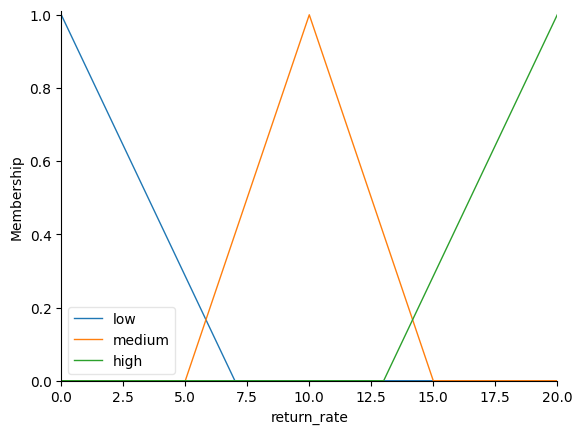

In [18]:
# Buatkan graf untuk keanggotaan return_rate
return_rate.view()
plt.show()

Contoh *output*:

![Visualisasi Output](./asset/7_keanggotaan_return_rate.png)

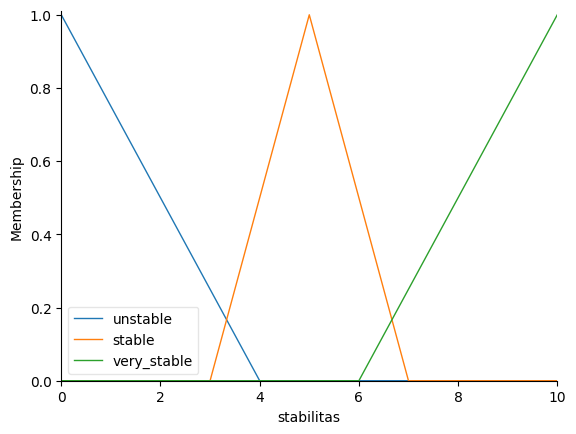

In [19]:
# Buatkan graf untuk keanggotaan stabilitas
stabilitas.view()
plt.show()

Contoh *output*:

![Visualisasi Output](./asset/8_keanggotaan_stabilitas.png)

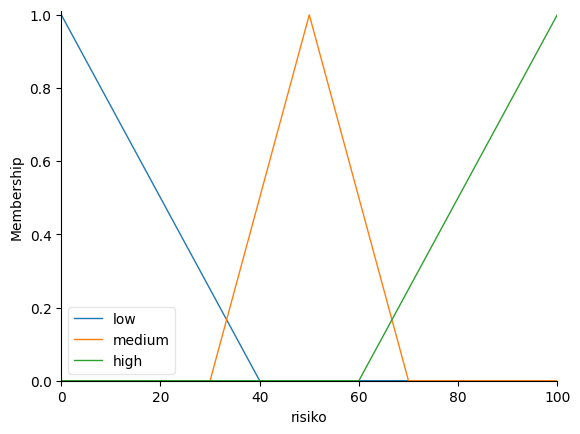

In [20]:
# Buatkan graf untuk keanggotaan risiko
risiko.view()
plt.show()

Contoh *output*:

![Visualisasi Output](./asset/9_keanggotaan_risiko.png)

#### **c. Buat Aturan Fuzzy** (15 Poin)

Buat aturan fuzzy yang mencakup penggabungan kondisi AND dan OR, serta aturan dengan bobot yang berbeda.

Aturan yang harus dibuat:
1. Jika Jumlah "low" DAN Return Rate "low", maka Risiko "low".
2. Jika Jumlah "medium" DAN STabilitas "stable", maka Risiko "medium".
3. Jika Jumlah "high" ATAU Return Rate "high" DAN STabilitas "unstable", maka Risiko "high".
4. Jika Return Rate "medium" DAN STabilitas "very_stable", maka Risiko "medium".
5. Jika Jumlah "low" DAN STabilitas "very_stable", maka Risiko "low".

In [21]:
# Aturan Fuzzy
rule1 = ctrl.Rule(jumlah['low'] & return_rate['low'], risiko['low'])
rule2 = ctrl.Rule(jumlah['medium'] & stabilitas['stable'], risiko['medium'])
rule3 = ctrl.Rule((jumlah['high'] | return_rate['high']) & stabilitas['unstable'], risiko['high'])
rule4 = ctrl.Rule(return_rate['medium'] & stabilitas['very_stable'], risiko['medium'])
rule5 = ctrl.Rule(jumlah['low'] & stabilitas['very_stable'], risiko['low'])

# Tambahkan aturan ke sistem kontrol
investment_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
investment_simulation = ctrl.ControlSystemSimulation(investment_ctrl)

#### **d. Simulasikan Sistem** (10 Poin)

Simulasikan sistem fuzzy dengan input berikut:

- Jumlah = 50 juta
- Return Rate = 10%
- Stabilitas = 6

Tampilkan risiko investasi yang disarankan.

In [22]:
# Masukkan input ke dalam sistem fuzzy
investment_simulation.input['jumlah'] = 50
investment_simulation.input['return_rate'] = 10
investment_simulation.input['stabilitas'] = 6

# Jalankan simulasi
investment_simulation.compute()

# Cetak hasil
print(f"Risiko investasi yang disarankan: {investment_simulation.output['risiko']:.2f}")

Risiko investasi yang disarankan: 50.00


Risiko investasi yang disarankan: 50.00


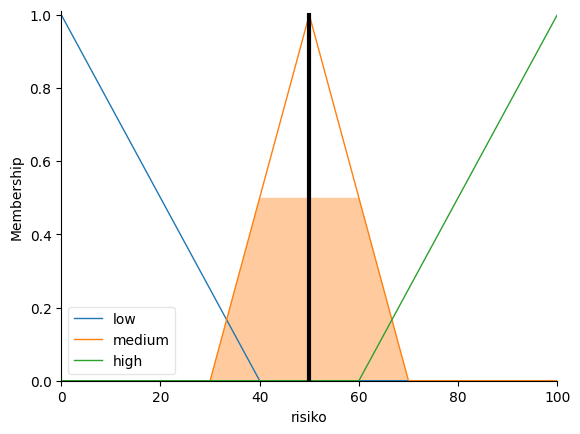

In [23]:
# Menampilkan hasil & visualisasi perhitungan
print(f"Risiko investasi yang disarankan: {investment_simulation.output['risiko']:.2f}")
risiko.view(sim=investment_simulation)
plt.show()

Contoh *output*:

![Visualisasi Output](./asset/10_investment_simulation.png)